# Version 2
**Implementation of conclusion in Version 1**

# Deep Learning Bootcamp - Assignment 2
# Beginners: Recognize an Animal in an Image
### Can you train a machine that would tell you the name of animal?


![alt](<https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/mucca_pecora.jpg>)

# Context

Image recognition is a vital component in robotics such as driverless vehicles or domestic robots. Image recognition is also important in image search engines such as Google or Bing image search whereby you use rich image content to query for similar stuff. Like in Google photos where the system uses image recognition to categorize your images into things like cats, dogs, people and so on so that you can quickly search your albums for things like, “give me photos of my cat”, that's awesome.

Ever noticed how Facebook instantly recognises your friend’s face and asks you if you want to tag him in that photo? That’s image recognition. That’s just a basic example.

# Objective

You are working on a robotics project where you are required to train your robot so that it can differentiate between two animals. Your task here is to build a deep learning model that helps you recognize the animal in images.

# Evaluation Criteria

Submissions are evaluated using Accuracy Score. 


# About the Data

The training dataset consists of 1200 medium quality animal images belonging to 2 categories: **mucca (cow)** and **pecora (sheep)**. All the images have been collected from "google images" and have been checked by humans. There is some erroneous data to simulate real conditions (eg. images taken by users of your app).

Dataset [Link](<https://github.com/dphi-official/Datasets/tree/master/animal_data>)

There are 4 files:

**train_beg.zip** - contains the images of cows and sheeps that are to be used for training and validation of the model. Each image has a unique name like - image_1, image_2, etc.
**Training_set_animals.csv** - contains the image’s filename and their corresponding target value (i.e. the actual animal name)
**test_beg.zip** - contains the images of cows and sheeps whose predictions you are to submit on the DPhi platform.
**Testing_set_animals.csv** - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you download are with their image’s filename in the same order as given in this file.

# Version 2
# Implementing what was mentioned in the conclusion by me in Version 1

# TASK 1: Loading Data 

In [1]:
#installing necessary packages required

In [2]:
pip install opencv.python

     |████████████████████████████████| 49.4MB 77kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [3]:
#importing libraries 
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#reading training dataset
Training_set_animals = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv")

In [5]:
#reading testing dataset with header none since there is no header given in testing dataset
Testing_set_animals = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv", header = None)

In [6]:
#naming the column/giving the header in testing dataset
Testing_set_animals.columns = ['filename']

In [7]:
# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 9874 (delta 8), reused 17 (delta 2), pack-reused 9847
Receiving objects: 100% (9874/9874), 427.70 MiB | 13.71 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Checking out files: 100% (9345/9345), done.


In [8]:
# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

In [9]:
# unzipping the contents
!unzip animal_data/train_beg.zip

Archive:  animal_data/train_beg.zip
   creating: train_beg/
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_beg/Image_1018.jpg  
  inflating: train_beg/Ima

In [10]:
# unzipping the contents
!unzip animal_data/test_beg.zip

Archive:  animal_data/test_beg.zip
   creating: test_beg/
  inflating: test_beg/Image_1.jpg    
  inflating: test_beg/Image_10.jpg   
  inflating: test_beg/Image_100.jpg  
  inflating: test_beg/Image_101.jpg  
  inflating: test_beg/Image_102.jpg  
  inflating: test_beg/Image_103.jpg  
  inflating: test_beg/Image_104.jpg  
  inflating: test_beg/Image_105.jpg  
  inflating: test_beg/Image_106.jpg  
  inflating: test_beg/Image_107.jpg  
  inflating: test_beg/Image_108.jpg  
  inflating: test_beg/Image_109.jpg  
  inflating: test_beg/Image_11.jpg   
  inflating: test_beg/Image_110.jpg  
  inflating: test_beg/Image_111.jpg  
  inflating: test_beg/Image_112.jpg  
  inflating: test_beg/Image_113.jpg  
  inflating: test_beg/Image_114.jpg  
  inflating: test_beg/Image_115.jpg  
  inflating: test_beg/Image_116.jpg  
  inflating: test_beg/Image_117.jpg  
  inflating: test_beg/Image_118.jpg  
  inflating: test_beg/Image_119.jpg  
  inflating: test_beg/Image_12.jpg   
  inflating: test_beg/Image_12

In [11]:
#viewing the first five rows content of training dataset
Training_set_animals.head() 

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [12]:
#viewing the first five rows content of testing dataset
Testing_set_animals.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [13]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage
Training_set_animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     1200 non-null   object
 1   animal_type  1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [14]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage
Testing_set_animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  400 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [15]:
#finding the total rows and columns of training dataset
Training_set_animals.shape

(1200, 2)

In [16]:
#finding the total rows and columns of testing dataset
Testing_set_animals.shape

(400, 1)

In [17]:
#checking the balance of the dataset
#it is a binary classification having two labels so we can use sigmoid activation function in the last output layer of our DL model
Training_set_animals['animal_type'].value_counts()

mucca     600
pecora    600
Name: animal_type, dtype: int64

In [18]:
# getting the path of all image files
filepaths_train = ['/content/train_beg/' + fname[:-4] + '.jpg' for fname in Training_set_animals['filename']]
filepaths_train

['/content/train_beg/Image_1.jpg',
 '/content/train_beg/Image_2.jpg',
 '/content/train_beg/Image_3.jpg',
 '/content/train_beg/Image_4.jpg',
 '/content/train_beg/Image_5.jpg',
 '/content/train_beg/Image_6.jpg',
 '/content/train_beg/Image_7.jpg',
 '/content/train_beg/Image_8.jpg',
 '/content/train_beg/Image_9.jpg',
 '/content/train_beg/Image_10.jpg',
 '/content/train_beg/Image_11.jpg',
 '/content/train_beg/Image_12.jpg',
 '/content/train_beg/Image_13.jpg',
 '/content/train_beg/Image_14.jpg',
 '/content/train_beg/Image_15.jpg',
 '/content/train_beg/Image_16.jpg',
 '/content/train_beg/Image_17.jpg',
 '/content/train_beg/Image_18.jpg',
 '/content/train_beg/Image_19.jpg',
 '/content/train_beg/Image_20.jpg',
 '/content/train_beg/Image_21.jpg',
 '/content/train_beg/Image_22.jpg',
 '/content/train_beg/Image_23.jpg',
 '/content/train_beg/Image_24.jpg',
 '/content/train_beg/Image_25.jpg',
 '/content/train_beg/Image_26.jpg',
 '/content/train_beg/Image_27.jpg',
 '/content/train_beg/Image_28.jpg',
 

In [19]:
# getting the path of all image files
filepaths_test = ['/content/test_beg/' + fname[:-4] + '.jpg' for fname in Testing_set_animals['filename']]
filepaths_test

['/content/test_beg/Image_1.jpg',
 '/content/test_beg/Image_2.jpg',
 '/content/test_beg/Image_3.jpg',
 '/content/test_beg/Image_4.jpg',
 '/content/test_beg/Image_5.jpg',
 '/content/test_beg/Image_6.jpg',
 '/content/test_beg/Image_7.jpg',
 '/content/test_beg/Image_8.jpg',
 '/content/test_beg/Image_9.jpg',
 '/content/test_beg/Image_10.jpg',
 '/content/test_beg/Image_11.jpg',
 '/content/test_beg/Image_12.jpg',
 '/content/test_beg/Image_13.jpg',
 '/content/test_beg/Image_14.jpg',
 '/content/test_beg/Image_15.jpg',
 '/content/test_beg/Image_16.jpg',
 '/content/test_beg/Image_17.jpg',
 '/content/test_beg/Image_18.jpg',
 '/content/test_beg/Image_19.jpg',
 '/content/test_beg/Image_20.jpg',
 '/content/test_beg/Image_21.jpg',
 '/content/test_beg/Image_22.jpg',
 '/content/test_beg/Image_23.jpg',
 '/content/test_beg/Image_24.jpg',
 '/content/test_beg/Image_25.jpg',
 '/content/test_beg/Image_26.jpg',
 '/content/test_beg/Image_27.jpg',
 '/content/test_beg/Image_28.jpg',
 '/content/test_beg/Image_29.

In [20]:
# Confirm if number of images is same as number of labels given
if len(Training_set_animals) == len(filepaths_train):
  print('Number of labels i.e. ', len(Training_set_animals), 'matches the number of filenames i.e. ', len(filepaths_train))
else:
  print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  1200 matches the number of filenames i.e.  1200


In [21]:
# Confirm if number of images is same as number of labels given
if len(Testing_set_animals) == len(filepaths_test):
  print('Number of labels i.e. ', len(Testing_set_animals), 'matches the number of filenames i.e. ', len(filepaths_test))
else:
  print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  400 matches the number of filenames i.e.  400


# TASK 2: Pre-processing

In [22]:
#creating a column filepath to have the path of the images in its respective filename
#converting animal_type column from object dtype to numeric dtype using apply method so we know 0 represents mucca and 1 pecora so that we can convert our submission prediction as per submission requirements
#we will be using Sequential() model with sigmoid activation function in the last output layer that gives binary classification
train_images = [[fname, '/content/train_beg/' + fname[:-4] + '.jpg'] for fname in Training_set_animals['filename']]
trainimages = pd.DataFrame(train_images)
trainimages.columns = ['filename', 'filepath']
Training_set_animals['animal_type'] = Training_set_animals['animal_type'].apply(lambda x: 0 if x == 'mucca' else 1)
trainimages['animal_type'] = Training_set_animals['animal_type']
trainimages.head()


,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,0
1,Image_2.jpg,/content/train_beg/Image_2.jpg,0
2,Image_3.jpg,/content/train_beg/Image_3.jpg,0
3,Image_4.jpg,/content/train_beg/Image_4.jpg,0
4,Image_5.jpg,/content/train_beg/Image_5.jpg,0


In [23]:
#creating a column filepath to have the path of the images in its respective filename
test_images = [[fname, '/content/test_beg/' + fname[:-4] + '.jpg'] for fname in Testing_set_animals['filename']]
testimages = pd.DataFrame(test_images)
testimages.columns = ['filename', 'filepath']
testimages.head()

,filename,filepath
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg


In [24]:
#checking the new column filepath count and column animal_type dtype
trainimages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     1200 non-null   object
 1   filepath     1200 non-null   object
 2   animal_type  1200 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 28.2+ KB


In [25]:
#checking the new column filepath count
testimages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  400 non-null    object
 1   filepath  400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [26]:
#there are lots of images in training datasets that are not of mucca or percora also there are some with wrong animal_type labels
# import matplotlib.image as mpimg 
# from matplotlib.pyplot import imshow
# %matplotlib inline

# for index, row in trainimages.iterrows():
#   print(index)
#   img = row['filepath']
#   name = row['animal_type']
#   if name == 0:
#     print('mucca_cow')
#   else:
#     print('pecora_sheep')
#   animal_images = mpimg.imread(img)
#   imshow(animal_images)
#   cv2.waitKey(0)
#   plt.show()

In [27]:
#reading the image file from the filepath column and converting to grayscale
#grayscale to make all colour and black-and-white images to same level
#also grayscale make an image file to 2 dimensional array whereas colour BGR (according to cv2 read and not RGB) creates 3 dimensional array
#since we will be using simple Sequential() DL model and not CNN DL model so grayscale simple 2 dimensional array wll be good for better performance
trainingimg = [] 
for index, row in trainimages.iterrows():
  img = row['filepath']
  img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  trainingimg.append(img_array)
  

In [28]:
#reading the image file from the filepath column and converting to grayscale
testingimg = []
for index, row in testimages.iterrows():
  testimg = row['filepath']
  testimg_array = cv2.imread(testimg, cv2.IMREAD_GRAYSCALE)
  testingimg.append(testimg_array)

In [29]:
#checking the len of the array whether it matches our training dataset rows
len(trainingimg)

1200

In [30]:
#checking the len of the array whether it matches our testing dataset rows
len(testingimg)

400

In [31]:
#checking the dimension of the array
trainingimg[0].shape

(200, 300)

In [32]:
#checking the dimension of the array
testingimg[0].shape

(200, 300)

In [33]:
#print to view the dimension
print(trainingimg[0])

[[205 205 205 ... 204 204 205]
 [203 203 204 ... 203 205 206]
 [205 204 203 ... 204 206 208]
 ...
 [250 254 250 ... 254 254 254]
 [246 252 249 ... 254 254 254]
 [248 254 251 ... 254 254 254]]


In [34]:
#checking the type now we can use reshape or flatten to make it from 2 dimension to 1 dimension
type(trainingimg[0])

numpy.ndarray

In [35]:
#converting 2 dimensional images value to 1 dimensiona and creating a new list of images read having 1 dimensional
newtrainingimg = []
for x in trainingimg:
  newtrainingimg.append(x.flatten())

newtrainingimg[0].shape


(60000,)

In [36]:
#checking the type now we can use reshape or flatten to make it from 2 dimension to 1 dimension
type(testingimg[0])

numpy.ndarray

In [37]:
#converting list to numpy ndarray as tensorflow doesnot support list
newtrainingimg = np.asarray(newtrainingimg).astype(np.float32)

In [38]:
#checking for type
type(newtrainingimg)

numpy.ndarray

In [39]:
#Normalizing the pixel values
newtrainingimg = newtrainingimg / 255.0

In [40]:
#checking the value of the element at position 0
newtrainingimg[0]

array([0.8039216 , 0.8039216 , 0.8039216 , ..., 0.99607843, 0.99607843,
       0.99607843], dtype=float32)

In [41]:
#converting 2 dimensional images value to 1 dimensiona and creating a new list of images read having 1 dimensional
newtestingimg = []
for x in testingimg:
  newtestingimg.append(x.flatten())

newtestingimg[0].shape


(60000,)

In [42]:
#converting list to numpy ndarray as tensorflow doesnot support list
newtestingimg = np.asarray(newtestingimg).astype(np.float32)

In [43]:
type(newtestingimg)

numpy.ndarray

In [44]:
#Normalizing the pixel values
newtestingimg = newtestingimg / 255.0

In [45]:
#checking the value of the element at position 0
newtestingimg[0]

array([0.29411766, 0.2627451 , 0.28627452, ..., 0.17254902, 0.14901961,
       0.14117648], dtype=float32)

In [46]:
#creating a new training dataset with read images values and animal type
newtrainimages = pd.DataFrame(newtrainingimg)
newtrainimages['animal_type'] = trainimages['animal_type']

In [47]:
#viewing the first 5 rows of new training dataset to check
newtrainimages.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59961,59962,59963,59964,59965,59966,59967,59968,59969,59970,59971,59972,59973,59974,59975,59976,59977,59978,59979,59980,59981,59982,59983,59984,59985,59986,59987,59988,59989,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999,animal_type
0,0.803922,0.803922,0.803922,0.803922,0.803922,0.807843,0.811765,0.811765,0.788235,0.803922,0.815686,0.819608,0.815686,0.807843,0.788235,0.776471,0.807843,0.819608,0.827451,0.823529,0.815686,0.807843,0.800000,0.796078,0.796078,0.815686,0.827451,0.807843,0.776471,0.768627,0.792157,0.819608,0.784314,0.796078,0.811765,0.827451,0.839216,0.843137,0.839216,0.839216,...,1.000000,1.000000,0.992157,1.000000,1.000000,0.996078,0.980392,0.968627,0.972549,0.992157,1.000000,0.945098,0.964706,0.988235,1.000000,1.000000,0.984314,0.960784,0.941176,0.984314,1.000000,0.992157,0.980392,1.000000,0.988235,0.968627,0.988235,0.976471,1.000000,0.996078,1.000000,0.972549,0.941176,0.976471,1.000000,0.996078,0.996078,0.996078,0.996078,0
1,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.988235,0.984314,0.988235,0.988235,0.984314,0.972549,0.988235,0.941176,0.972549,1.000000,0.815686,0.709804,0.678431,0.537255,0.517647,...,0.603922,0.572549,0.529412,0.541176,0.549020,0.568627,0.600000,0.631373,0.650980,0.654902,0.647059,0.658824,0.650980,0.635294,0.627451,0.627451,0.635294,0.639216,0.643137,0.600000,0.615686,0.623529,0.619608,0.615686,0.627451,0.647059,0.658824,0.654902,0.627451,0.611765,0.627451,0.635294,0.627451,0.623529,0.627451,0.596078,0.607843,0.631373,0.647059,0
2,0.941176,0.933333,0.925490,0.925490,0.933333,0.937255,0.937255,0.933333,0.925490,0.929412,0.929412,0.933333,0.933333,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,...,0.964706,0.956863,0.952941,0.968627,0.976471,0.992157,0.980392,0.996078,0.996078,1.000000,0.996078,0.984314,0.988235,0.988235,0.980392,0.992157,0.992157,0.980392,0.992157,0.968627,0.972549,0.980392,0.984314,0.988235,0.992157,0.992157,0.992157,0.980392,0.964706,0.972549,1.000000,0.992157,0.956863,0.960784,1.000000,0.988235,0.988235,0.988235,0.988235,0
3,0.415686,0.454902,0.388235,0.411765,0.356863,0.168627,0.113725,0.200000,0.364706,0.427451,0.478431,0.474510,0.505882,0.509804,0.376471,0.333333,0.482353,0.423529,0.392157,0.400000,0.490196,0.478431,0.431373,0.356863,0.305882,0.333333,0.407843,0.360784,0.274510,0.392157,0.517647,0.470588,0.462745,0.352941,0.443137,0.486275,0.423529,0.384314,0.396078,0.509804,...,0.266667,0.270588,0.270588,0.266667,0.278431,0.290196,0.282353,0.258824,0.243137,0.239216,0.243137,0.239216,0.247059,0.235294,0.211765,0.211765,0.258824,0.321569,0.356863,0.313726,0.196078,0.219608,0.447059,0.549020,0.431373,0.290196,0.203922,0.211765,0.243137,0.352941,0.196078,0.101961,0.188235,0.133333,0.133333,0.172549,0.176471,0.176471,0.172549,0
4,0.901961,0.937255,0.905882,0.870588,0.894118,0.898039,0.882353,0.894118,0.894118,0.894118,0.894118,0.894118,0.894118,0.894118,0.894118,0.894118,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,...,0.117647,0.305882,0.360784,0.525490,0.552941,0.513726,0.474510,0.494118,0.501961,0.482353,0.490196,0.478431,0.592157,0.517647,0.286275,0.231373,0.364706,0.380392,0.247059,0.211765,0.176471,0.137255,0.141176,0.211765,0.349020,0.400000,0.286275,0.262745,0.360784,0.247059,0.196078,0.341176,0.298039,0.188235,0.290196,0.470588,0.403922,0.356863,0.356863,0


In [48]:
#shuffling the rows of the DataFrame using the sample() method with the parameter frac as 1, which determines what fraction of total instances need to be returned.
#we are performing this because animal_type column has its value somewhat together so this will ensure that our X_train and X_test dataset while will be representative of our original dataset
newtrainimages = newtrainimages.sample(frac = 1) 

In [49]:
#checking the shuffle
newtrainimages.head(21)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59961,59962,59963,59964,59965,59966,59967,59968,59969,59970,59971,59972,59973,59974,59975,59976,59977,59978,59979,59980,59981,59982,59983,59984,59985,59986,59987,59988,59989,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999,animal_type
745,0.196078,0.207843,0.309804,0.270588,0.196078,0.227451,0.243137,0.270588,0.250980,0.258824,0.270588,0.278431,0.282353,0.282353,0.278431,0.278431,0.294118,0.258824,0.239216,0.250980,0.262745,0.258824,0.258824,0.270588,0.282353,0.274510,0.270588,0.282353,0.294118,0.294118,0.278431,0.262745,0.250980,0.231373,0.207843,0.196078,0.196078,0.192157,0.180392,0.168627,...,0.376471,0.294118,0.478431,0.384314,0.352941,0.356863,0.435294,0.525490,0.537255,0.447059,0.352941,0.364706,0.431373,0.392157,0.486275,0.431373,0.407843,0.580392,0.443137,0.462745,0.505882,0.466667,0.454902,0.580392,0.490196,0.549020,0.596078,0.466667,0.419608,0.513726,0.368627,0.486275,0.592157,0.325490,0.462745,0.513726,0.384314,0.356863,0.419608,1
349,0.776471,0.764706,0.756863,0.756863,0.760784,0.764706,0.760784,0.756863,0.760784,0.764706,0.764706,0.764706,0.768627,0.768627,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.776471,0.776471,0.780392,0.780392,0.780392,0.776471,0.780392,0.780392,0.780392,0.780392,0.784314,0.784314,0.784314,...,0.474510,0.454902,0.439216,0.474510,0.392157,0.411765,0.466667,0.443137,0.403922,0.384314,0.341176,0.360784,0.478431,0.407843,0.352941,0.447059,0.564706,0.631373,0.607843,0.415686,0.478431,0.450980,0.494118,0.407843,0.392157,0.349020,0.462745,0.498039,0.458824,0.470588,0.450980,0.396078,0.462745,0.498039,0.403922,0.419608,0.427451,0.427451,0.435294,0
752,1.000000,0.984314,0.976471,1.000000,0.925490,0.666667,0.447059,0.427451,0.384314,0.372549,0.345098,0.317647,0.301961,0.294118,0.282353,0.270588,0.262745,0.282353,0.305882,0.321569,0.337255,0.364706,0.403922,0.431373,0.415686,0.435294,0.380392,0.403922,0.450980,0.380392,0.478431,0.772549,0.941176,0.984314,1.000000,0.984314,0.980392,1.000000,0.996078,0.968627,...,0.003922,0.003922,0.003922,0.019608,0.015686,0.015686,0.015686,0.023529,0.023529,0.015686,0.003922,0.000000,0.003922,0.003922,0.000000,0.007843,0.007843,0.007843,0.015686,0.003922,0.031373,0.235294,0.447059,0.447059,0.325490,0.180392,0.043137,0.062745,0.192157,0.321569,0.384314,0.423529,0.458824,0.450980,0.407843,0.247059,0.129412,0.145098,0.219608,1
151,0.564706,0.501961,0.431373,0.384314,0.341176,0.309804,0.301961,0.309804,0.447059,0.439216,0.415686,0.376471,0.341176,0.333333,0.349020,0.372549,0.329412,0.282353,0.239216,0.247059,0.305882,0.356863,0.356863,0.329412,0.329412,0.349020,0.376471,0.400000,0.407843,0.403922,0.392157,0.384314,0.274510,0.325490,0.352941,0.333333,0.305882,0.313726,0.341176,0.352941,...,0.580392,0.745098,0.643137,0.682353,0.458824,0.545098,0.305882,0.596078,0.490196,0.325490,0.588235,0.631373,0.541176,0.407843,0.564706,0.682353,0.803922,0.521569,0.647059,0.717647,0.654902,0.619608,0.482353,0.568627,0.474510,0.474510,0.584314,0.623529,0.549020,0.650980,0.807843,0.517647,0.619608,0.764706,0.611765,0.639216,0.690196,0.678431,0.662745,0
100,0.396078,0.384314,0.498039,0.568627,0.482353,0.419608,0.411765,0.360784,0.454902,0.541176,0.690196,0.658824,0.533333,0.400000,0.262745,0.262745,0.376471,0.443137,0.537255,0.650980,0.384314,0.223529,0.482353,0.482353,0.498039,0.352941,0.411765,0.454902,0.458824,0.219608,0.298039,0.458824,0.419608,0.431373,0.478431,0.466667,0.427451,0.482353,0.545098,0.509804,...,0.223529,0.223529,0.235294,0.211765,0.152941,0.329412,0.486275,0.380392,0.321569,0.415686,0.462745,0.290196,0.074510,0.050980,0.145098,0.137255,0.211765,0.431373,0.588235,0.733333,0.576471,0.384314,0.305882,0.380392,0.482353,0.486275,0.427451,0.501961,0.588235,0.419608,0.235294,0.258824,0.223529,0.184314,0.309804,0.219608,0.313726,0.423529,0.486275,0
199,0.984314,1.000000,0.945098,0.9

In [50]:
#overview of our new training dataset
newtrainimages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 745 to 1175
Columns: 60001 entries, 0 to animal_type
dtypes: float32(60000), int64(1)
memory usage: 274.7 MB


In [51]:
#creating a new testing dataset with read images values
newtestimages = pd.DataFrame(newtestingimg)

In [52]:
#viewing the first 5 rows of new testing dataset to check
newtestimages.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59960,59961,59962,59963,59964,59965,59966,59967,59968,59969,59970,59971,59972,59973,59974,59975,59976,59977,59978,59979,59980,59981,59982,59983,59984,59985,59986,59987,59988,59989,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
0,0.294118,0.262745,0.286275,0.196078,0.180392,0.247059,0.247059,0.760784,0.745098,0.737255,0.725490,0.756863,0.803922,0.823529,0.823529,0.784314,0.780392,0.796078,0.819608,0.823529,0.815686,0.800000,0.796078,0.803922,0.780392,0.772549,0.764706,0.772549,0.780392,0.780392,0.764706,0.752941,0.745098,0.745098,0.749020,0.752941,0.756863,0.756863,0.756863,0.756863,...,0.647059,0.678431,0.709804,0.729412,0.639216,0.627451,0.615686,0.615686,0.607843,0.588235,0.560784,0.541176,0.529412,0.592157,0.552941,0.439216,0.333333,0.262745,0.196078,0.160784,0.400000,0.443137,0.486275,0.498039,0.505882,0.501961,0.466667,0.419608,0.419608,0.384314,0.443137,0.239216,0.109804,0.223529,0.219608,0.200000,0.211765,0.172549,0.149020,0.141176
1,0.729412,0.717647,0.705882,0.705882,0.713726,0.717647,0.713726,0.705882,0.713726,0.713726,0.717647,0.721569,0.721569,0.725490,0.725490,0.725490,0.729412,0.729412,0.729412,0.729412,0.729412,0.729412,0.729412,0.729412,0.733333,0.733333,0.737255,0.737255,0.737255,0.737255,0.737255,0.737255,0.733333,0.733333,0.729412,0.725490,0.721569,0.717647,0.713726,0.713726,...,0.305882,0.298039,0.360784,0.443137,0.298039,0.458824,0.439216,0.352941,0.392157,0.450980,0.450980,0.376471,0.388235,0.372549,0.368627,0.333333,0.219608,0.341176,0.321569,0.411765,0.286275,0.247059,0.266667,0.298039,0.294118,0.313726,0.325490,0.294118,0.231373,0.156863,0.427451,0.439216,0.286275,0.243137,0.164706,0.262745,0.345098,0.200000,0.156863,0.184314
2,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078
3,0.580392,0.568627,0.611765,0.552941,0.454902,0.549020,0.592157,0.431373,0.501961,0.466667,0.435294,0.435294,0.458824,0.474510,0.470588,0.454902,0.411765,0.403922,0.419608,0.415686,0.423529,0.490196,0.517647,0.462745,0.423529,0.537255,0.537255,0.529412,0.560784,0.458824,0.388235,0.490196,0.745098,0.556863,0.490196,0.509804,0.466667,0.466667,0.509804,0.490196,...,0.835294,0.933333,0.909804,0.913725,0.850980,0.847059,0.858824,0.945098,0.898039,0.964706,0.890196,0.913725,0.925490,0.850980,0.858824,0.874510,0.854902,0.929412,0.882353,0.901961,0.925490,0.862745,0.956863,0.843137,0.898039,0.956863,0.847059,0.956863,0.847059,0.941176,0.862745,0.894118,0.878431,0.949020,0.882353,0.945098,0.917647,0.929412,0.933333,0.917647
4,0.356863,0.337255,0.309804,0.290196,0.282353,0.278431,0.270588,0.262745,0.247059,0.258824,0.270588,0.266667,0.254902,0.250980,0.258824,0.270588,0.321569,0.317647,0.337255,0.372549,0.380392,0.352941,0.329412,0.325490,0.349020,0.329412,0.364706,0.392157,0.372549,0.372549,0.368627,0.321569,0.266667,0.290196,0.258824,0.239216,0.270588,0.278431,0.290196,0.341176,...,0.537255,0.541176,0.525490,0.501961,0.443137,0.529412,0.596078,0.674510,0.541176,0.435294,0.454902,0.435294,0.400000,0.321569,0.329412,0.341176,0.447059,0.482353,0.435294,0.407843,0.427451,0.498039,0.572549,0.537255,0.521569,0.372549,0.423529,0.356863,0.423529,0.443137,0.474510,0.431373,0.505882,0.564706,0.529412,0.431373,0.360784,0.482353,0.478431,0.427451


In [53]:
#overview of our new testing dataset
newtestimages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 60000 entries, 0 to 59999
dtypes: float32(60000)
memory usage: 91.6 MB


In [54]:
#initializing the X (independent variables) and y (dependent variable)
X = newtrainimages.drop('animal_type', axis = 1)
y = newtrainimages['animal_type']

In [55]:
#checking the shape of X variable
X.shape

(1200, 60000)

In [56]:
#splitting X and y into X_train, X_test and y_train, y_test with 80:20 ratio
X_train = X.iloc[:959, :]
X_test = X.iloc[960:, :]
y_train = y.iloc[:959]
y_test = y.iloc[960:]

In [57]:
#checking the split train and test dataset

In [58]:
X_train.shape

(959, 60000)

In [59]:
y_train.shape

(959,)

In [60]:
X_test.shape

(240, 60000)

In [61]:
y_test.shape

(240,)

# TASK 3: Building a Multi-Layer Perceptron


In [62]:
#importing libraries
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [63]:
#checking the X_train column shape
X_train.shape[1]

60000

In [70]:
#clear any logs from previous runs
!rm -rf ./logs/ 

In [71]:
#building the model with Optimization Techniques 
modelB = Sequential()
modelB.add(Dense(2048, activation='relu', input_shape=(X.shape[1],)))   
modelB.add(Dense(1024, activation='relu'))
modelB.add(Dense(512, activation='relu'))
modelB.add(Dense(1, activation='sigmoid'))

In [72]:
#compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizerB = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
modelB.compile(loss='binary_crossentropy', optimizer= optimizerB , metrics=['accuracy'])

In [73]:
#printing the summary of the model
modelB.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2048)              122882048 
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 125,505,537
Trainable params: 125,505,537
Non-trainable params: 0
_________________________________________________________________


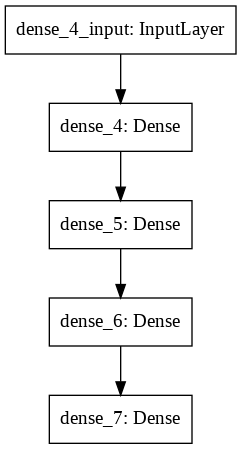

In [74]:
#plotting the model flowchart
from tensorflow.keras.utils import plot_model
plot_model(modelB)

# TASK 5: Training the model

In [ ]:
#training the model
modelB.fit(X, y, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
120/120 [==============================] - 114s 946ms/step - loss: 17.5027 - accuracy: 0.5142
Epoch 2/200
120/120 [==============================] - 114s 947ms/step - loss: 0.8664 - accuracy: 0.5300
Epoch 3/200
120/120 [==============================] - 113s 943ms/step - loss: 0.7781 - accuracy: 0.5192
Epoch 4/200
120/120 [==============================] - 115s 957ms/step - loss: 0.7066 - accuracy: 0.5558
Epoch 5/200
120/120 [==============================] - 114s 950ms/step - loss: 0.6999 - accuracy: 0.5792
Epoch 6/200
120/120 [==============================] - 114s 948ms/step - loss: 0.6764 - accuracy: 0.5817
Epoch 7/200
120/120 [==============================] - 114s 947ms/step - loss: 0.6801 - accuracy: 0.5642
Epoch 8/200
120/120 [==============================] - 113s 944ms/step - loss: 0.6773 - accuracy: 0.5642
Epoch 9/200
120/120 [==============================] - 114s 953ms/step - loss: 0.6737 - accuracy: 0.5783
Epoch 10/200
120/120 [==============================] 

# TASK 7: Predict

In [ ]:
#predicting the new test dataset
predictionsB = (modelB.predict(newtestimages) > 0.5).astype("int32")

In [ ]:
#converting the predicted 0 and 1 to respective animal names
namepredictionsB = []
animals = ['mucca' , 'pecora']

for i in predictionsB:
  for x in i:
    namepredictionsB.append([animals[x]])

#converting list to numpy ndarray as predictions
namepredictionsB = np.asarray(namepredictionsB).astype(np.str)

In [ ]:
#creating Dataframe of predicted value with particular respective index
resB = pd.DataFrame(namepredictionsB) #namepreditions are the final predictions of the model on input features of the unseen new test dataset
resB.index = newtestimages.index # its important for comparison. Here newtestimages is the new test dataset
resB.columns = ['animal_type']

#download the csv file locally
from google.colab import files
resB.to_csv('submissionfileB.csv')         
files.download('submissionfileB.csv') # got accuracy: 61.75 on new test dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TASK 8: Optimization Techniques


In [97]:
#clear any logs from previous runs
!rm -rf ./logs/ 

In [98]:
#building the model with Optimization Techniques 

finalmodel = Sequential()
finalmodel.add(Dense(2048, activation='relu', input_shape=(X.shape[1],))) 
tf.keras.layers.Dropout(0.2)
finalmodel.add(Dense(2048, activation='relu'))
tf.keras.layers.Dropout(0.2)
finalmodel.add(Dense(2048, activation='relu'))
tf.keras.layers.Dropout(0.2)
finalmodel.add(Dense(2048, activation='relu'))
tf.keras.layers.Dropout(0.2)
finalmodel.add(Dense(2048, activation='relu'))
tf.keras.layers.Dropout(0.2)
finalmodel.add(Dense(1, activation='sigmoid'))

In [99]:
#compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizerB = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
finalmodel.compile(loss='binary_crossentropy', optimizer= optimizerB , metrics=['accuracy'])

In [100]:
#printing the summary of the model
finalmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 2048)              122882048 
_________________________________________________________________
dense_22 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_23 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_24 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_25 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 2049      
Total params: 139,669,505
Trainable params: 139,669,505
Non-trainable params: 0
________________________________________

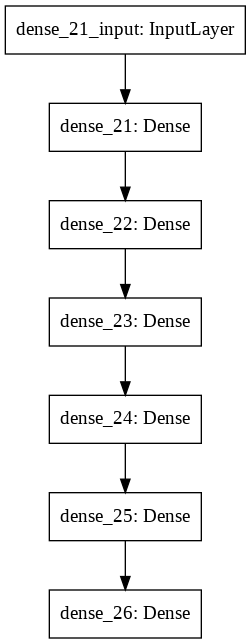

In [101]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(finalmodel)

In [102]:
#training the model
finalmodel.fit(X, y, epochs=350, batch_size=128, verbose=1)

Epoch 1/350
10/10 [==============================] - 23s 2s/step - loss: 1570.5437 - accuracy: 0.4833
Epoch 2/350
10/10 [==============================] - 23s 2s/step - loss: 3.6101 - accuracy: 0.4900
Epoch 3/350
10/10 [==============================] - 23s 2s/step - loss: 0.9084 - accuracy: 0.4833
Epoch 4/350
10/10 [==============================] - 23s 2s/step - loss: 0.7125 - accuracy: 0.4833
Epoch 5/350
10/10 [==============================] - 23s 2s/step - loss: 0.6982 - accuracy: 0.5117
Epoch 6/350
10/10 [==============================] - 23s 2s/step - loss: 7.6519 - accuracy: 0.4800
Epoch 7/350
10/10 [==============================] - 23s 2s/step - loss: 2.7429 - accuracy: 0.5183
Epoch 8/350
10/10 [==============================] - 23s 2s/step - loss: 0.7091 - accuracy: 0.5008
Epoch 9/350
10/10 [==============================] - 23s 2s/step - loss: 0.7045 - accuracy: 0.4833
Epoch 10/350
10/10 [==============================] - 23s 2s/step - loss: 0.6985 - accuracy: 0.4917
Epoch 

In [103]:
#predicting the new test dataset
finalpredictions = (finalmodel.predict(newtestimages) > 0.5).astype("int32")

In [104]:
#converting the predicted 0 and 1 to respective animal names
animals = ['mucca' , 'pecora']
namefinalpredictions = []

for i in finalpredictions:
  for x in i:
    namefinalpredictions.append([animals[x]])

#converting list to numpy ndarray as predictions
namefinalpredictions = np.asarray(namefinalpredictions).astype(np.str)

In [105]:
#creating Dataframe of predicted value with particular respective index
finalres = pd.DataFrame(namefinalpredictions) #namepreditions are the final predictions of the model on input features of the unseen new test dataset
finalres.index = newtestimages.index # its important for comparison. Here newtestimages is the new test dataset
finalres.columns = ['animal_type']

#download the csv file locally
from google.colab import files
finalres.to_csv('submissionfileFinal.csv')         
files.download('submissionfileFinal.csv') # got accuracy: 50.5 on new test dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion

Not able to get above 61.75 accuracy.

It seems may be some more learning is required to work out to get better outcome. Or perhaps a completely different approach say CNN may give far more better results perhaps.

# Note for the Judges
Hi Judges,

I look forward to receive your valuable feedback for improvement. More so because I had a lots of roller-coaster ride will making this project with system crashes, getting restricted from using GPU and TPU services and etc. Besides I am an absolute beginner in DL and this project was really an interesting challenge.
The marks may not point out where I need to improve but your valuable feedback and guidance will, so requesting you to please kindly provide yours valuable feedback and guidance.
